**Step 1: Importation**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#importing data
df = pd.read_csv('/content/drive/MyDrive/DataScience/MajorProject/owid-covid-data.csv')
print("Data imported sucessfully.\n\n\n")

#checking the sucessful importation of data
df.head()

Data imported sucessfully.





,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
#to get no. of rows and columns
df.shape

(86436, 59)

That is there are 86436 rows and 59 columns.

**Step 3: Processing**

In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                 4165
location                                     0
date                                         0
total_cases                               2170
new_cases                                 2172
new_cases_smoothed                        3173
total_deaths                             11882
new_deaths                               11724
new_deaths_smoothed                       3173
total_cases_per_million                   2625
new_cases_per_million                     2627
new_cases_smoothed_per_million            3623
total_deaths_per_million                 12324
new_deaths_per_million                   12166
new_deaths_smoothed_per_million           3623
reproduction_rate                        16402
icu_patients                             77611
icu_patients_per_million                 77611
hosp_patients                            75442
hosp_patients_per_million                75442
weekly_icu_ad

In [ ]:
x=0
del_df= []
for i in df:
  if df[i].isnull().sum() > 30000:
    del_df.append(df.columns[x])
    temp_df = df.drop(del_df, axis=1)
  x = x+1
print("Data with higher null values: \n",del_df,"\n\n\n")
print(temp_df.shape)
print(temp_df['date'].max())
temp_df.isnull().sum()

Data with higher null values: 
 ['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'extreme_poverty', 'handwashing_facilities'] 



(86436, 31)
2021-05-06


iso_code                               0
continent                           4165
location                               0
date                                   0
total_cases                         2170
new_cases                           2172
new_cases_smoothed                  3173
total_deaths                       11882
new_deaths                         11724
new_deaths_smoothed                 3173
total_cases_per_million             2625
new_cases_per_million               2627
new_cases_smoothed_per_million      3623
total_deaths_per_million           12324
new_deaths_per_million             12166
new_deaths_smoothed_per_million     3623
reproduction_rate                  16402
stringency_index                   13066
population                           555
population_density                  5976
median_age                          8605
aged_65_older                       9493
aged_70_older                       9041
gdp_per_capita                      8260
cardiovasc_death

In [ ]:
columns_with_more_zeros = ['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']
temp_df[columns_with_more_zeros] = temp_df[columns_with_more_zeros].fillna(0)

In [ ]:
temp_df = temp_df.dropna()

In [ ]:
temp_df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
m

In [ ]:
print("Data till date: ",temp_df['date'].max())

Data till date:  2021-05-05


**Questions:**

In [ ]:
temp_df['total_cases'].index = range(0,69565)
temp_df['total_deaths'].index = range(0,69565)
temp_df['location'].index = range(0,69565)

max_index_case = temp_df['total_cases'][temp_df['total_cases'] == temp_df['total_cases'].max()].index[0] #index of one with the heighest case
min_index_case = temp_df['total_cases'][temp_df['total_cases'] == temp_df['total_cases'].min()].index[0] #index of one with the lowest case
max_index_death = temp_df['total_deaths'][temp_df['total_deaths'] == temp_df['total_deaths'].max()].index[0] #index of one with the heighest case
min_index_death = temp_df['total_deaths'][temp_df['total_deaths'] == temp_df['total_deaths'].min()].index[0] #index of one with the lowest case


In [ ]:

print("Country having the heighest no. of cases: ",temp_df['location'][max_index_case], "i.e",temp_df['total_cases'].max())
print("Country having the lowest no. of cases: ",temp_df['location'][min_index_case], "i.e",temp_df['total_cases'].min())
print("Country having the heighest no. of deaths: ",temp_df['location'][max_index_death], "i.e",temp_df['total_deaths'].max())
print("Country having the lowest no. of deaths: ",temp_df['location'][min_index_death], "i.e",temp_df['total_deaths'].min())

Country having the heighest no. of cases:  United States i.e 32557444.0
Country having the lowest no. of cases:  Bahamas i.e 100.0
Country having the heighest no. of deaths:  United States i.e 579275.0
Country having the lowest no. of deaths:  Armenia i.e 0.0


**Step 4: Processing for INDIA**

In [ ]:
ind_df= df.set_index('iso_code').filter(like='IND', axis=0)
print("Rows, coloumns:" ,str(ind_df.shape))
ind_df.head()

Rows, coloumns: (463, 58)


,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [ ]:

ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, IND to IND
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   continent                              463 non-null    object 
 1   location                               463 non-null    object 
 2   date                                   463 non-null    object 
 3   total_cases                            463 non-null    float64
 4   new_cases                              463 non-null    float64
 5   new_cases_smoothed                     458 non-null    float64
 6   total_deaths                           422 non-null    float64
 7   new_deaths                             422 non-null    float64
 8   new_deaths_smoothed                    458 non-null    float64
 9   total_cases_per_million                463 non-null    float64
 10  new_cases_per_million                  463 non-null    float64
 11  new_cases

**Step 5: Handling Missing Value**

In [ ]:
print(ind_df.shape,"\n\n")
ind_df.isnull().sum()

(463, 58) 




continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              41
new_deaths                                41
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  41
new_deaths_per_million                    41
new_deaths_smoothed_per_million            5
reproduction_rate                         46
icu_patients                             463
icu_patients_per_million                 463
hosp_patients                            463
hosp_patients_per_million                463
weekly_icu_admissions                    463
weekly_icu_admissions_per_million        463
weekly_hos

In [ ]:
c=0
del_data= []
for i in ind_df:
  if ind_df[i].isnull().sum() > 300:
    del_data.append(ind_df.columns[c])
    temp_data = ind_df.drop(del_data, axis=1)
  c = c+1
print("Data with higher null values: \n",del_data,"\n\n\n")
print(temp_data.shape)
print(temp_data['date'].max())
temp_data.isnull().sum()

Data with higher null values: 
 ['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million'] 



(463, 41)
2021-05-06


continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
new_cases_smoothed                  5
total_deaths                       41
new_deaths                         41
new_deaths_smoothed                 5
total_cases_per_million             0
new_cases_per_million               0
new_cases_smoothed_per_million      5
total_deaths_per_million           41
new_deaths_per_million             41
new_deaths_smoothed_per_million     5
reproduction_rate                  46
new_tests                          69
total_tests                        60
total_tests_per_thousand           60
new_tests_per_thousand             69
new_tests_smoothed                 52
new_tests_smoothed_per_thousand    52
positive_rate                      53
tests_per_case                     53
tests_units                        45
stringency_index                    6
population  

In [ ]:
temp_data["total_deaths"].fillna(temp_data.groupby("location")["total_deaths"].transform("mean"), inplace = True)
temp_data["new_deaths"].fillna(temp_data.groupby("location")["new_deaths"].transform("mean"), inplace = True)
temp_data["new_cases_smoothed_per_million"].fillna(temp_data.groupby("location")["new_cases_smoothed_per_million"].transform("mean"), inplace = True)
temp_data["new_cases_smoothed"].fillna(temp_data.groupby("location")["new_cases_smoothed"].transform("mean"), inplace = True)
temp_data["new_deaths_smoothed"].fillna(temp_data.groupby("location")["new_deaths_smoothed"].transform("mean"), inplace = True)
temp_data["total_deaths_per_million"].fillna(temp_data.groupby("location")["total_deaths_per_million"].transform("mean"), inplace = True)
temp_data["new_deaths_per_million"].fillna(temp_data.groupby("location")["new_deaths_per_million"].transform("mean"), inplace = True)
temp_data["new_deaths_smoothed_per_million"].fillna(temp_data.groupby("location")["new_deaths_smoothed_per_million"].transform("mean"), inplace = True)
temp_data["reproduction_rate"].fillna(temp_data.groupby("location")["reproduction_rate"].transform("mean"), inplace = True)
temp_data["new_tests"].fillna(temp_data.groupby("location")["new_tests"].transform("mean"), inplace = True)
temp_data["total_tests"].fillna(temp_data.groupby("location")["total_tests"].transform("mean"), inplace = True)
temp_data["total_tests_per_thousand"].fillna(temp_data.groupby("location")["total_tests_per_thousand"].transform("mean"), inplace = True)
temp_data["new_tests_smoothed"].fillna(temp_data.groupby("location")["new_tests_smoothed"].transform("mean"), inplace = True)
temp_data["new_tests_smoothed_per_thousand"].fillna(temp_data.groupby("location")["new_tests_smoothed_per_thousand"].transform("mean"), inplace = True)
temp_data["positive_rate"].fillna(temp_data.groupby("location")["positive_rate"].transform("mean"), inplace = True)
temp_data["tests_per_case"].fillna(temp_data.groupby("location")["tests_per_case"].transform("mean"), inplace = True)
temp_data["stringency_index"].fillna(temp_data.groupby("location")["stringency_index"].transform("mean"), inplace = True)

In [ ]:
import datetime as dt
temp_data["date"]=pd.to_datetime(temp_data["date"])
temp_data['total_cases'] = temp_data['total_cases'].astype(int)
temp_data['new_cases'] = temp_data['new_cases'].astype(int)
temp_data['total_deaths'] = temp_data['total_deaths'].astype(int)
temp_data['new_deaths'] = temp_data['new_deaths'].astype(int)
temp_data['population'] = temp_data['population'].astype(int)
print(temp_data['date'].max())
temp_data.info()

2021-05-06 00:00:00
<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, IND to IND
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   continent                        463 non-null    object        
 1   location                         463 non-null    object        
 2   date                             463 non-null    datetime64[ns]
 3   total_cases                      463 non-null    int64         
 4   new_cases                        463 non-null    int64         
 5   new_cases_smoothed               463 non-null    float64       
 6   total_deaths                     463 non-null    int64         
 7   new_deaths                       463 non-null    int64         
 8   new_deaths_smoothed              463 non-null    float64       
 9   total_cases_per_million          463 non-null    float64       
 10  new_cases_per_million            463 non-null

In [ ]:
#groupby by taking avg value
data_India = temp_data[temp_data['location'] == 'India']
#data_India_deaths1 = data_India.groupby('date').agg({'total_deaths':'mean'})
#data_India_deaths2 = data_India.groupby('date').agg({'new_deaths':'mean'})
#data_India_cases1 = data_India.groupby('date').agg({'total_cases':'mean'})
#data_India_cases2 = data_India.groupby('date').agg({'new_cases':'mean'})
#print(data_India_report1)
#print(data_India_report2)
data_India.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,2020-01-30,1,1,44343.342179,89870,554,486.338445,0.001,0.001,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-01-31,1,0,44343.342179,89870,554,486.338445,0.001,0.000,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-01,1,0,44343.342179,89870,554,486.338445,0.001,0.000,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-02,2,1,44343.342179,89870,554,486.338445,0.001,0.001,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-03,3,1,44343.342179,89870,554,486.338445,0.002,0.001,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


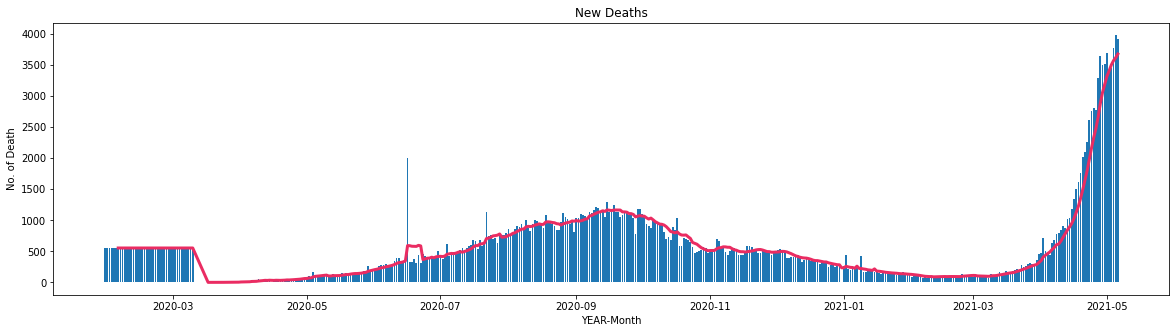

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(data_India['date'],data_India['new_deaths'])
plt.plot(data_India['date'],data_India['new_deaths'].rolling(7).mean(),c='#ea2c62',linewidth=3)
plt.xlabel("YEAR-Month")
plt.ylabel("No. of Death")
plt.title('New Deaths')
plt.show()

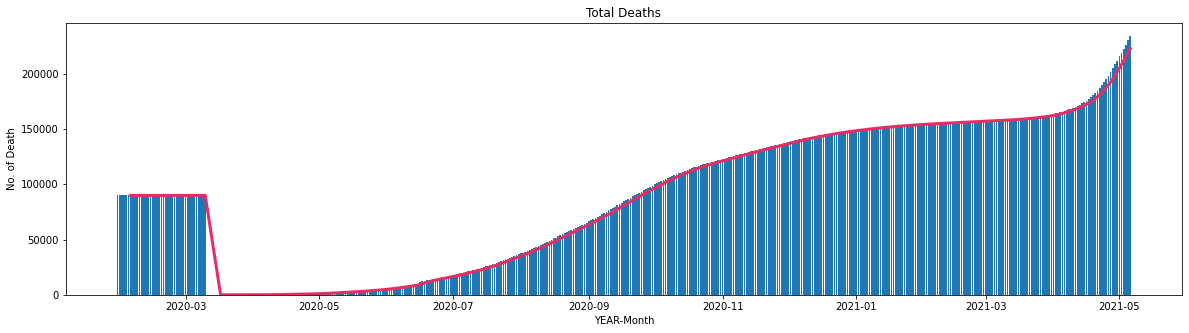

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(data_India['date'],data_India['total_deaths'])
plt.plot(data_India['date'],data_India['total_deaths'].rolling(7).mean(),c='#ea2c62',linewidth=3)
plt.xlabel("YEAR-Month")
plt.ylabel("No. of Death")
plt.title('Total Deaths')
plt.show()


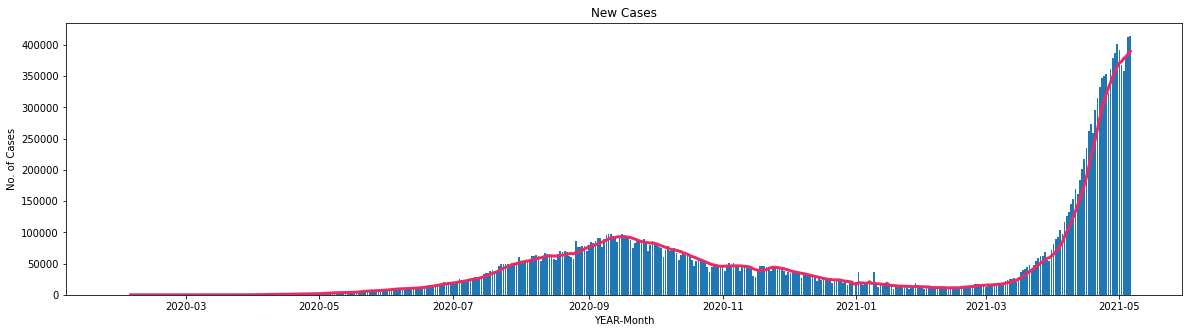

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(data_India['date'],data_India['new_cases'])
plt.plot(data_India['date'],data_India['new_cases'].rolling(7).mean(),c='#ea2c62',linewidth=3)
plt.xlabel("YEAR-Month")
plt.ylabel("No. of Cases")
plt.title('New Cases')
plt.show()

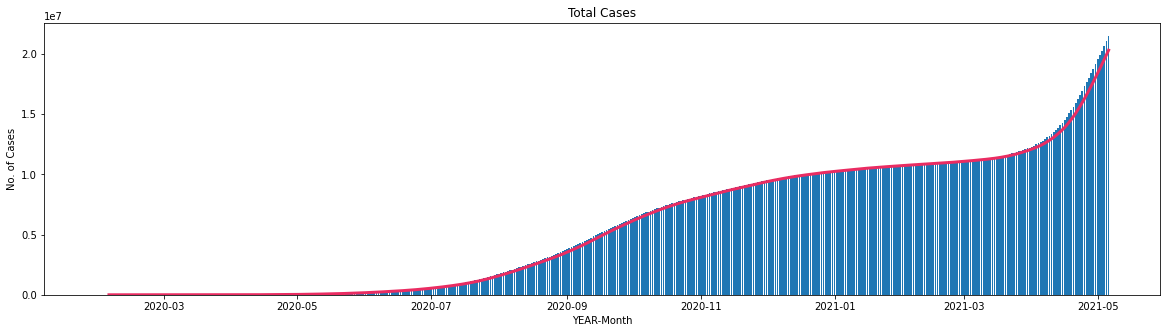

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(data_India['date'],data_India['total_cases'])
plt.plot(data_India['date'],data_India['total_cases'].rolling(7).mean(),c='#ea2c62',linewidth=3)
plt.xlabel("YEAR-Month")
plt.ylabel("No. of Cases")
plt.title('Total Cases')
plt.show()

**Step 5:Forcasting**

In [ ]:
#data_India["date"] = data_India["date"].map(dt.datetime.fromordinal)
#data_India.head()

In [ ]:
data_India_total_cases = data_India

data_India_total_deaths = data_India

**TOTAL CASES**

In [ ]:
data_India_total_cases = data_India_total_cases.rename(columns={'date':'ds','total_cases':'y'})
data_India_total_cases.head()

,continent,location,ds,y,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,2020-01-30,1,1,44343.342179,89870,554,486.338445,0.001,0.001,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-01-31,1,0,44343.342179,89870,554,486.338445,0.001,0.000,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-01,1,0,44343.342179,89870,554,486.338445,0.001,0.000,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-02,2,1,44343.342179,89870,554,486.338445,0.001,0.001,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-03,3,1,44343.342179,89870,554,486.338445,0.002,0.001,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


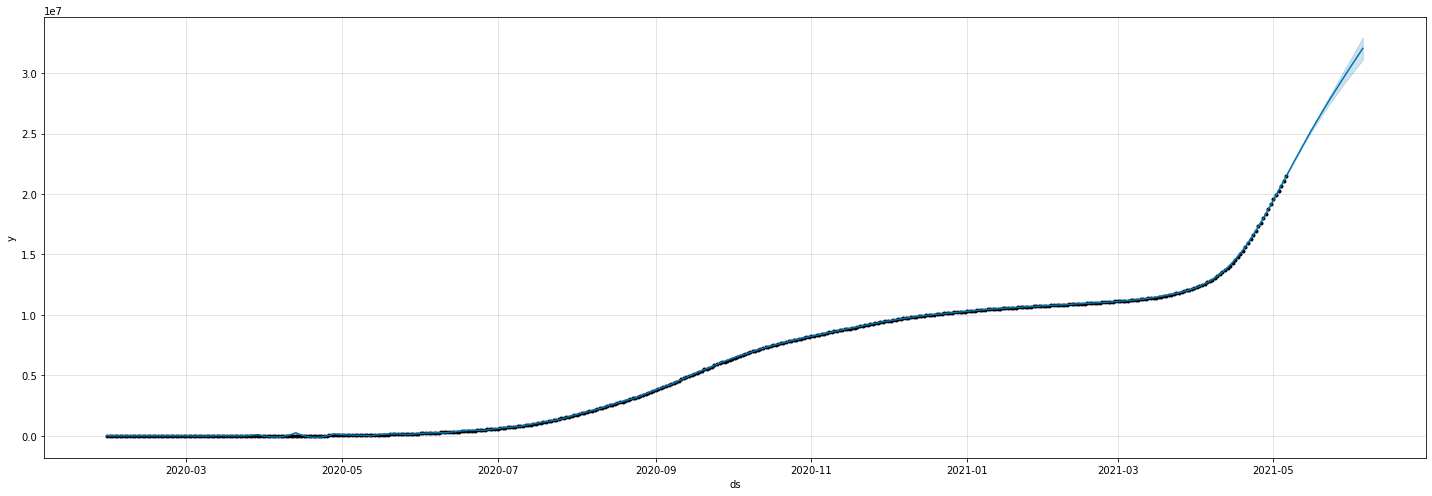

In [ ]:
from fbprophet import Prophet
model2 = Prophet(changepoint_prior_scale=0.9,  yearly_seasonality=True , daily_seasonality=True)
model2.fit(data_India_total_cases)
forecast = model2.make_future_dataframe(periods=30,freq='D')
forecast = model2.predict(forecast)

model2.plot(forecast,figsize=(20,7));


In [ ]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
488,2021-06-01,3.077118e+07,3.002888e+07,3.143558e+07,2.975776e+07,2.902368e+07,3.042764e+07
489,2021-06-02,3.109497e+07,3.031196e+07,3.183175e+07,2.990713e+07,2.912773e+07,3.063994e+07
490,2021-06-03,3.141556e+07,3.058304e+07,3.219447e+07,3.005649e+07,2.922127e+07,3.083150e+07
491,2021-06-04,3.173360e+07,3.083090e+07,3.258372e+07,3.020585e+07,2.931615e+07,3.106384e+07
492,2021-06-05,3.204951e+07,3.111948e+07,3.295173e+07,3.035522e+07,2.941469e+07,3.126507e+07


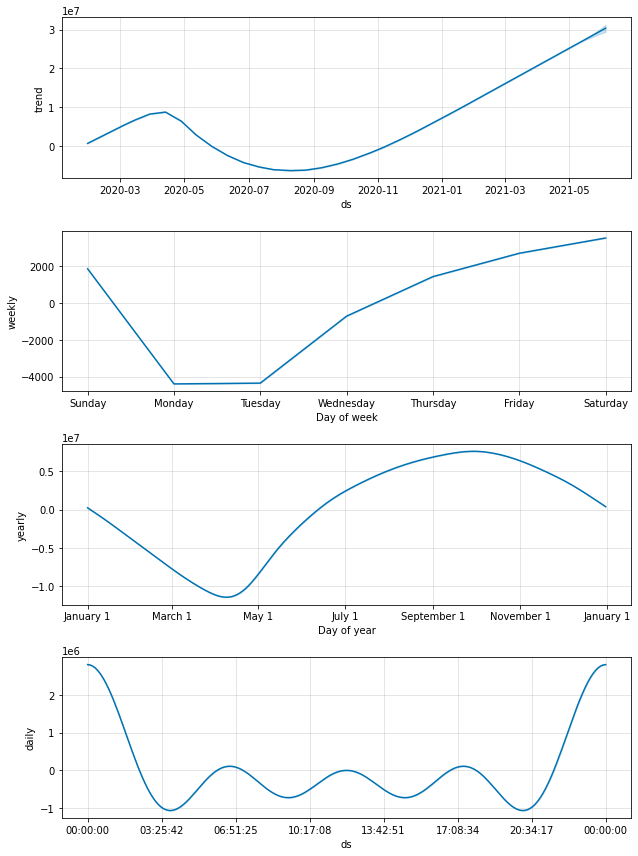

In [ ]:
model2.plot_components(forecast);

The above images shows the trends and seasonality of the time series data. We can see there is an increasing trend, meaning the number of new cases has increased over time.

**TOTAL DEATHS**

In [ ]:

data_India_total_deaths = data_India_total_deaths.rename(columns={'date':'ds','total_deaths':'y'})
data_India_total_deaths.head()

,continent,location,ds,total_cases,new_cases,new_cases_smoothed,y,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,2020-01-30,1,1,44343.342179,89870,554,486.338445,0.001,0.001,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-01-31,1,0,44343.342179,89870,554,486.338445,0.001,0.000,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-01,1,0,44343.342179,89870,554,486.338445,0.001,0.000,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-02,2,1,44343.342179,89870,554,486.338445,0.001,0.001,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-03,3,1,44343.342179,89870,554,486.338445,0.002,0.001,32.132771,65.123566,0.401953,0.352404,1.18705,730806.274112,1.040497e+08,75.398094,NaN,701054.294404,0.508024,0.061283,24.300976,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


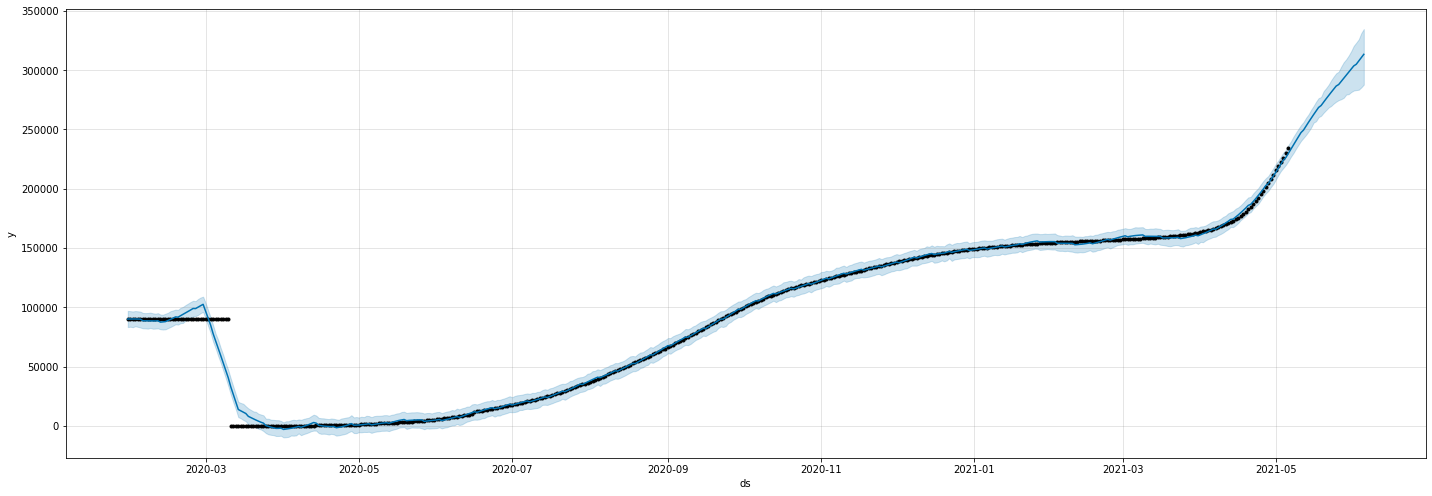

In [ ]:
from fbprophet import Prophet
model4 = Prophet(changepoint_prior_scale=0.9,  yearly_seasonality=True , daily_seasonality=True)
model4.fit(data_India_total_deaths)
forecast = model4.make_future_dataframe(periods=30,freq='D')
forecast = model4.predict(forecast)

model4.plot(forecast,figsize=(20,7));


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
488,2021-06-01,303474.639975,282700.698694,320387.240542,349620.124924,328582.893499,365147.164867
489,2021-06-02,304865.435240,283103.775286,323064.892165,351301.098311,329231.938695,367814.107278
490,2021-06-03,307642.579421,283423.800232,325897.738611,352982.071697,329913.445546,370826.062851
491,2021-06-04,310399.813063,285326.109520,331075.375144,354663.045083,330471.363546,373766.336658
492,2021-06-05,313249.894475,287707.007185,334568.859942,356344.018469,330740.760937,376865.334294


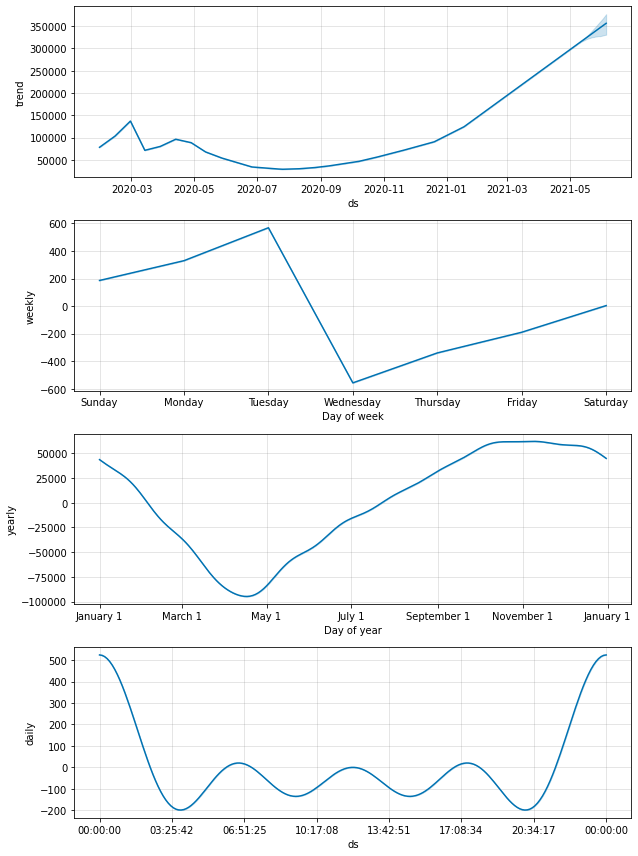

In [ ]:
model4.plot_components(forecast);

The above images shows the trends and seasonality of the time series data. We can see there is an increasing trend, meaning the number of new cases has increased over time.